## Gibbs

In [1]:
import numpy as np
from scipy.stats import binom, beta
import matplotlib.pyplot as plt

In [2]:
alpha = 1
beta_ = 2
n = 10

In [3]:
x_given_y = lambda y: binom(n, y)
y_given_x = lambda x: beta(x + alpha, n - x + beta_)

In [47]:
def gibbs(x_given_y, y_given_x, N, x0):
    samples_x = np.zeros(N + 1)
    samples_y = np.zeros(N + 1)
    samples_x[0] = x0
    samples_y[0] = y_given_x(x0).rvs()
    for i in range(1, N + 1):
        samples_x[i] = x_given_y(samples_y[i - 1]).rvs()
        samples_y[i] = y_given_x(samples_x[i - 1]).rvs()
    return samples_x, samples_y

In [48]:
samples_x, samples_y = gibbs(x_given_y, y_given_x, 10000, 1)
samples_x = samples_x[1:] # the x0 is not used
samples_y = samples_y[:-1]

In [49]:
burning = 100
window = 50
clean_x, clean_y = samples_x[burning::window], samples_y[burning::window]

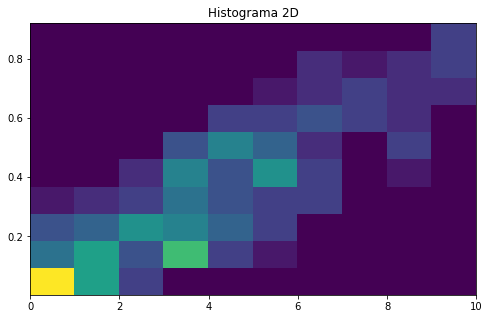

In [73]:
fig = plt.figure(figsize=(8, 5))
plt.title('Histograma 2D')
plt.hist2d(clean_x, clean_y)
plt.show()

Se observa que el mayor _peak_ se da para los valores de 0 y 0 en $x$ e $y$. Y que va disminuyendo pero que la mayor frecuencia se da en aproximadamente los puntos $x = x$, $y = \frac{x}{10}$, disminuyendo a medida que aumenta $x$ (o $y$).

In [57]:
from matplotlib import cm
from scipy.special import factorial as f
from mpl_toolkits.mplot3d import Axes3D

Se muestra la función original en 3d

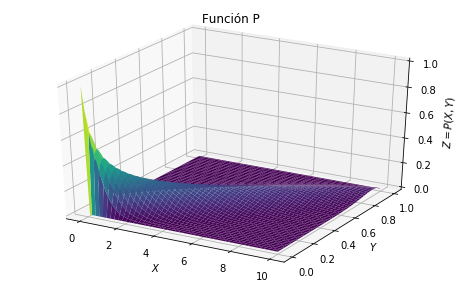

In [68]:
P = lambda x, y: (f(n) / (f(n - x) * f(x))) * (y ** (x + alpha - 1) * (1 - y) ** (n - x + beta_ - 1))
x = np.linspace(0, 10, 100)
y = np.linspace(0, 1, 100)

X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(8, 5))
ax = fig.gca(projection='3d')
ax.set_title('Función P')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z = P(X, Y)$')

ax.plot_surface(X, Y, P(X, Y), cmap=cm.viridis, linewidth=0)
plt.show()

Se observa que los gráficos muestran que los peaks del _heatmap_ coinciden con los peaks de la función pedida.

La comparación con _Metropolis Hastings_ es que se puede ver _Gibbs_ como un caso particular del método anterior, donde se está utilizando las distribuciones condicionales, como las propuestas $Q^*$ de Metrópolis. En este caso, lo que se utiliza es $$Q^*_1 = P(X \mid Y) = \text{Bin}(n, y)$$, y por otro lado, $$Q^*_2 = P(Y \mid X) = \text{Beta}(x + \alpha, n - x + \beta)$$

Sin embargo, no hay un método de aceptación en este caso, esto es, que no se rechazan muestras en base a un $\alpha$ (distinto al parámetro de la Beta), sino que en _Gibbs_ se aceptan todas las muestras. Por eso arbitrariamente se definió un _burning_ y un _window_ para de cierto modo compensar ese sesgo.

Se observó empíricamente que si ambos parámetros eran muy grandes el ajuste se hacía cada vez menor por lo que probablemente hay poca correlación entre los datos, que es lo que se busca evitar con la ventana y las muestras quemadas.

Los rangos hacen sentido, en base a los dominios de las variables, $[0, 1]$ para $y$ y $[0, n]$ para $x$